### Importing neccessary libary

In [273]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import kernels,GaussianProcessRegressor

import math


### Imoporting data from `ucimlrepo`

In [274]:

# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [275]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

In [276]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

### EDA

In [277]:
# Fetch dataset
# automobile = fetch_ucirepo(id=10)

In [278]:
# Convert features and targets to numeric values
features_df = pd.DataFrame(concrete_compressive_strength.data.features)
targets_df = pd.DataFrame(concrete_compressive_strength.data.targets)

targets_df.head(10)

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
5,47.03
6,43.70
7,36.45
8,45.85
9,39.29


### Convert data to numberic numbers

In [279]:
X = features_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
y = targets_df.apply(pd.to_numeric, errors='coerce').fillna(0)

X.head(10)

# len(X)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


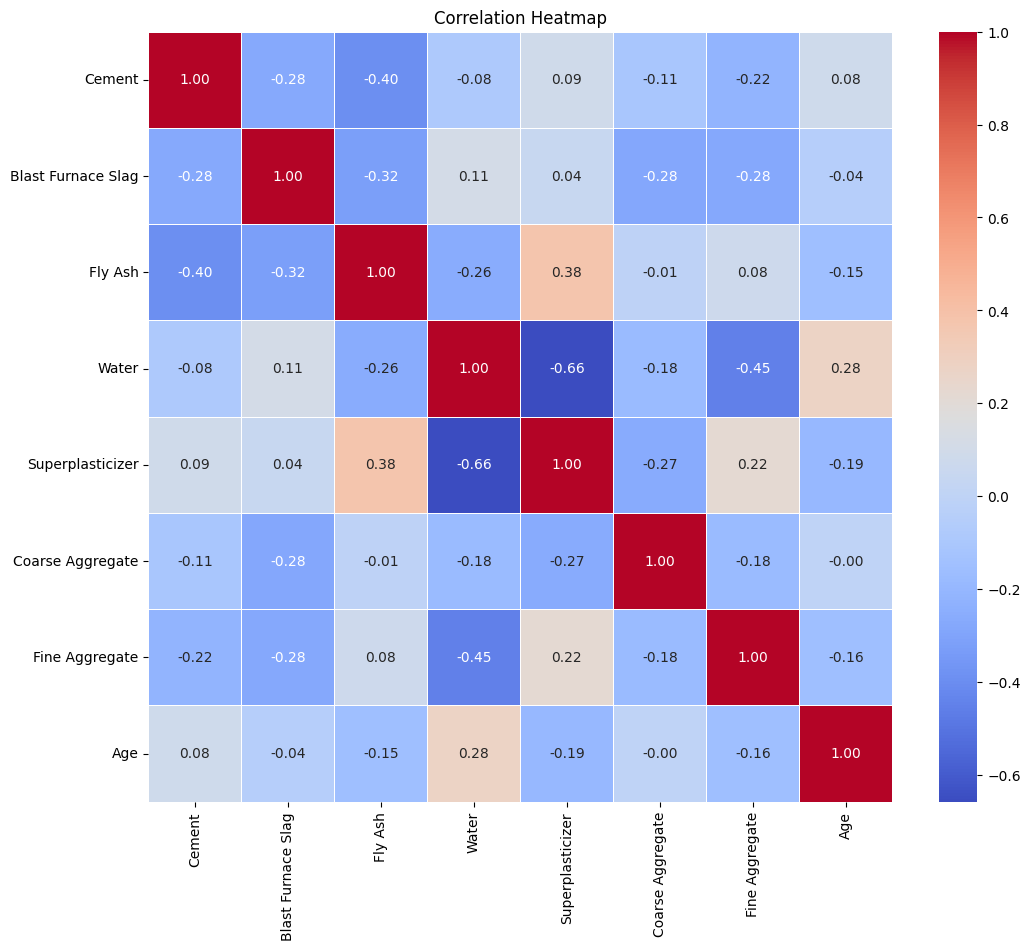

In [280]:
corr_matrix = X.corr()


# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Remove Highly correlated data

In [281]:
# Remove features with correlation higher than 0.65
high_correlation_features = corr_matrix[abs(corr_matrix) > 0.8]
high_correlation_features = high_correlation_features.stack().reset_index()
high_correlation_features = high_correlation_features[high_correlation_features['level_0'] != high_correlation_features['level_1']]
high_correlation_features

,level_0,level_1,0


In [282]:
# features_to_remove = ['city-mpg', 'engine-size', 'width', 'length','height', 'wheel-base']
# # Drop features with high correlation
# df_filtered = X.drop(columns=features_to_remove)

# df_filtered.head(10)

### Split data into training and testing sets

In [330]:
# X = df_filtered
# X = df_filtered.values
# y = y.values
# X_plot = X_plot.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

X_test

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
870,149.0,139.0,109.0,193.0,6.0,892.0,780.0,28
318,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,100
261,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,28
535,393.0,0.0,0.0,192.0,0.0,940.6,785.6,90


In [284]:
# X_train
# y_test.shape
# X_test.shape

In [331]:
# Define kernel
kernel = 1.0 * RBF(length_scale=1.0)
kernel

1**2 * RBF(length_scale=1)

In [286]:
# np.random.seed(0)
# n=50
 
# kernel_ =[kernels.RBF (),
 
#          kernels.RationalQuadratic(),
 
#          kernels.ExpSineSquared(periodicity=10.0),
 
#          kernels.Matern()
#          ]
# print(kernel_, '\n')

# kernel_

In [287]:
# n_restarts_optimizer = 10
# for kernel in kernel_:
#     # Train Gaussian Process
#     gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts_optimizer)
#     gaussian_process.fit(X_train, y_train)

#     X_test_copy = X_test.copy()
#     X_test_copy.reset_index(drop=True, inplace=True)

#     y_test_copy = y_test.copy()
#     y_test_copy.reset_index(drop=True, inplace=True)

#     # Evaluate model
#     y_pred, std = gaussian_process.predict(X_test_copy, return_std=True)

#     mse = mean_squared_error(y_test_copy, y_pred) 
#     print(f"Mean Squared error with {kernel} Kernel ({mse})")
#     mae = mean_absolute_error(y_test_copy, y_pred)
#     print(f"Mean Absolute error with {kernel} Kernel ({mae})")

#      # Loop through all features and plot
#     for feature in X.columns:
#         plt.figure(figsize=(10, 6))
#         plt.scatter(X_test_copy.index, X_test_copy[feature], c='r', label="Data")
#         plt.plot(X_test_copy.index, y_pred, label="Prediction")
#         plt.fill_between(X_test_copy.index, y_pred - 1.96 * std, y_pred + 1.96 * std, alpha=0.2, label="95% Confidence Interval")
#         plt.xlabel(feature)
#         plt.ylabel("Output")
#         plt.title(f"Gaussian Process Regression with Multiple Inputs ({feature})")
#         plt.legend()
#         plt.show()
    
    # fig, axes = plt.subplots(nrows = math.ceil(len(X.columns) / 2), ncols = 2, figsize=(30, 30), sharey=True)
    # # Loop through all features and plot
    # for idx, feature in enumerate(X.columns):
    #     row = idx // 2
    #     col = idx % 2
    #     ax = axes[row, col]
    #     ax.plot(X_test_copy.index, X_test_copy[feature], c='r', label="Data")
    #     ax.plot(X_test_copy.index, y_pred, label="Prediction")
    #     ax.fill_between(X_test_copy.index, y_pred - 1.96 * std, y_pred + 1.96 * std, alpha=0.2, label="95% Confidence Interval")
    #     ax.set_xlabel("Index")
    #     ax.set_ylabel("Output")
    #     ax.set_title(f"Gaussian Process Regression with {kernel} Kernel ({feature})")
    #     ax.legend()

    # # Hide empty subplots if any
    # for i in range(len(X.columns), math.ceil(len(X.columns) / 2) * 2):
    #     axes.flatten()[i].axis('off')

    # plt.tight_layout()
    # plt.show()

In [332]:
# Train Gaussian Process
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [333]:
X_test_copy = X_test.copy()
X_test_copy.reset_index(drop=True, inplace=True)

y_test_copy = y_test.copy()
y_test_copy.reset_index(drop=True, inplace=True)

In [334]:
from scipy.stats import chi2

# Predict on testing data
y_pred, std = gaussian_process.predict(X_test_copy, return_std=True)

# # Compute Mahalanobis distance for each data point
# residuals = y_test - y_pred
# mahalanobis_dist = np.sqrt(np.diag(np.dot(np.dot(residuals, np.linalg.inv(cov)), residuals.T)))

# # Compute critical value for 95% confidence interval
# df = X_train.shape[1]  # Degrees of freedom
# alpha = 0.05  # Significance level
# critical_value = chi2.ppf(1 - alpha, df)

# # Check if data falls within 95% confidence interval
# within_confidence_interval = mahalanobis_dist < np.sqrt(critical_value)

# print("Mahalanobis Distance:", mahalanobis_dist)
# print("Critical Value:", np.sqrt(critical_value))
# print("Within Confidence Interval:", within_confidence_interval)

In [291]:
# # Visualize predictions and uncertainty
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_copy, y_pred, c='b', label="Predictions")
# plt.errorbar(y_test_copy, y_pred, yerr=2 * np.sqrt(np.diag(cov)), fmt='o', alpha=0.5, label="95% Confidence Interval")
# plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], '--', c='r', label="Ideal")
# plt.xlabel("True Output")
# plt.ylabel("Predicted Output")
# plt.title("GPR Predictions and Uncertainty")
# plt.legend()
# plt.show()



In [335]:
y_pred

samples_prior = gaussian_process.sample_y(X_test_copy, 3)
samples_prior

array([[ 527.49916115, -152.74449321, -350.79549285],
       [  44.68673389,   44.68673141,   44.68673915],
       [ 119.65778239, -353.04082   ,  581.19508039],
       [  35.30000256,   35.30000641,   35.29999562],
       [ 292.66901676,   -8.42724528, -123.68321489],
       [ 670.08741861,  128.08276518, -223.50911918],
       [ 558.45013639,   19.89044094,  575.01145486],
       [-292.23240627,   90.44724364,  442.71379607],
       [ 284.10202475, -189.67938966,  558.45042653],
       [ -45.25988165, -108.46937803,  270.93175455],
       [ -30.86521659, -201.08378468, -257.52967448],
       [ 122.78001038, -107.51607884,  571.16086311],
       [  43.07290718, -243.1526381 ,  -80.14022582],
       [ 434.86694528, -516.20499058,  239.95607421],
       [ 227.57077619,   53.055195  ,  283.25384989],
       [  36.3841069 , -120.14332075,  -46.35219259],
       [ 132.72706078, -487.47321047,  183.6262702 ],
       [  99.77761045,  138.38435812,  275.7646318 ],
       [ 446.76988162, -271.

In [346]:
# Loop through all features and plot
for feature in X_test_copy.columns:
    # plt.plot(X_test_copy[feature], y_test_copy, label="$f(x) = sinc(x)$", linestyle="dotted")
    
    # plt.plot(X_test_copy[feature], samples_prior, '--')
    plt.scatter(X_test_copy[feature], y_test_copy, c='b', label="Observation")
    # plt.errorbar(
    #     X_test_copy[feature],
    #     y_test_copy.iloc[:, 0],
    #     std,
    #     linestyle="None",
    #     color="tab:red",
    #     marker=".",
    #     markersize=10,
    #     label="error",
    # )
    plt.scatter(X_test_copy[feature], y_pred, c='r', label="prediction")
    # plt.fill_between(
    #     X_test_copy[feature],
    #     y_pred - 1.96 * std,
    #     y_pred + 1.96 * std,
    #     alpha=0.5,
    #     label="95% condidence interval",
    #     color="tab:green",
    # )

    plt.legend()
    plt.xlabel(f"${feature}$")
    plt.ylabel("$target$")
    plt.show()

In [293]:
X_test_copy = X_test.copy()
X_test_copy.reset_index(drop=True, inplace=True)

X_test_copy


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
1,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
2,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
4,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
201,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
202,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
203,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
204,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [294]:
# Evaluate model
y_pred, std = gaussian_process.predict(X_test_copy, return_std=True)

mse = mean_squared_error(y_pred, std)
mae = mean_absolute_error(y_pred, std)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

std



Mean Squared Error: 80631.15049100036
Mean Absolute Error: 278.4384927950439


array([2.91655704e+02, 7.62939453e-06, 2.91655704e+02, 7.62939453e-06,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
       2.91655704e+02, 2.91655704e+02, 2.91655704e+02, 2.91655704e+02,
      

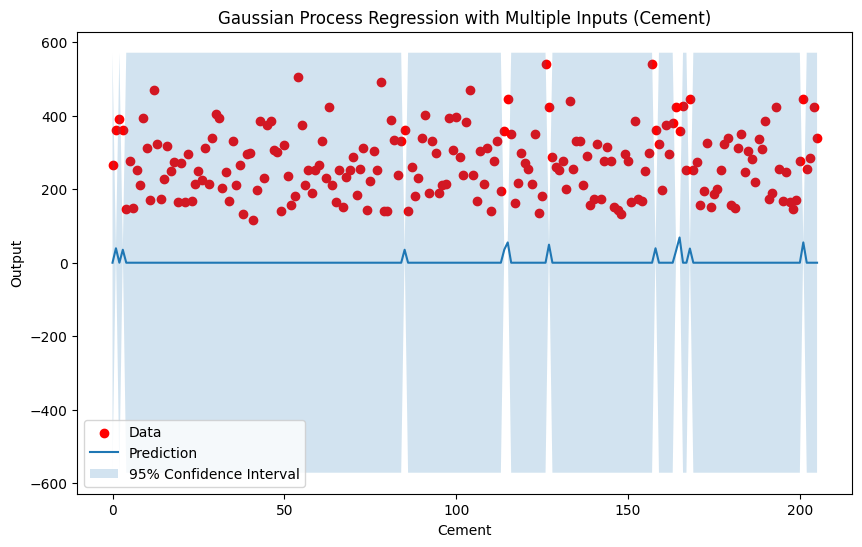

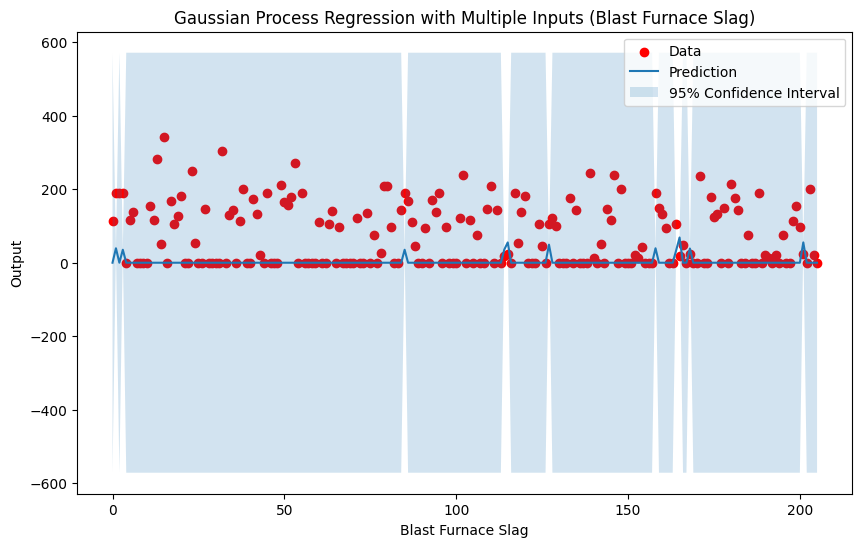

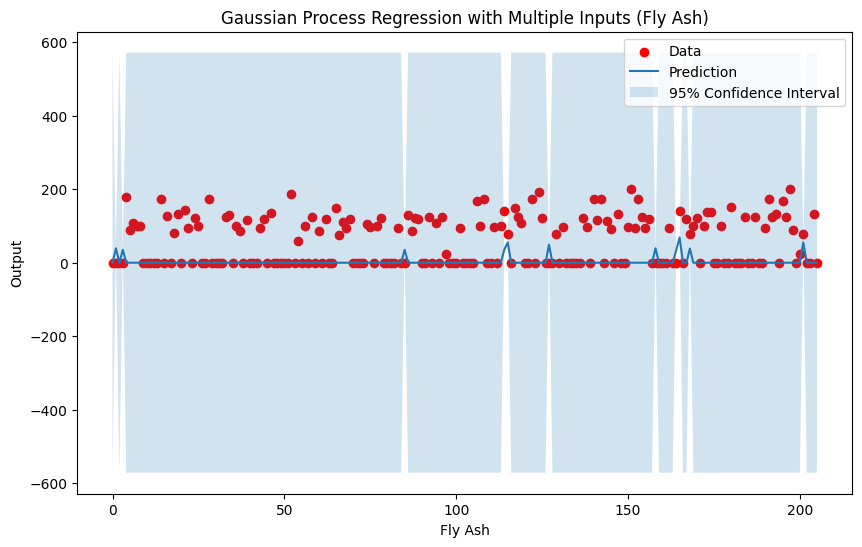

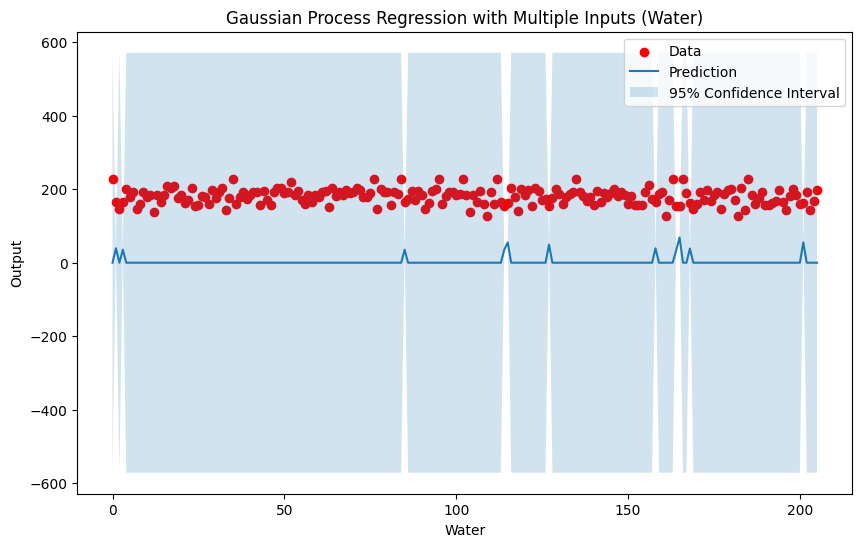

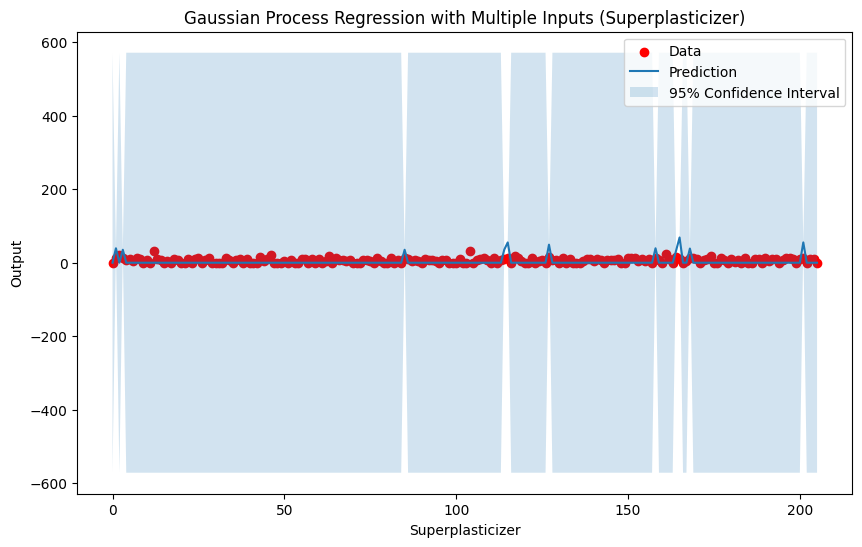

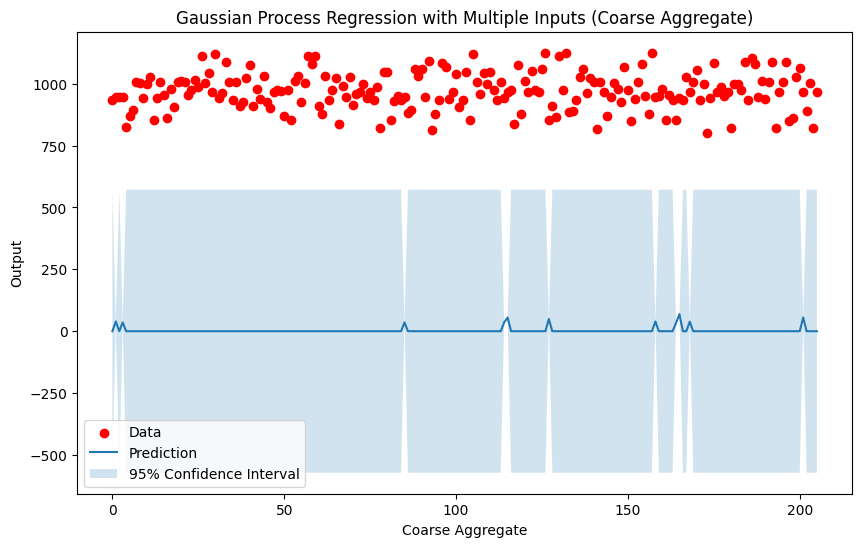

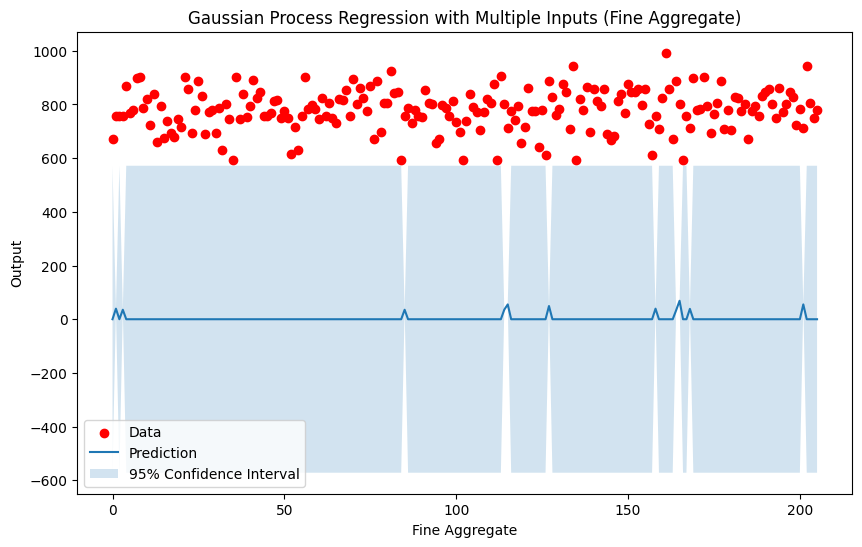

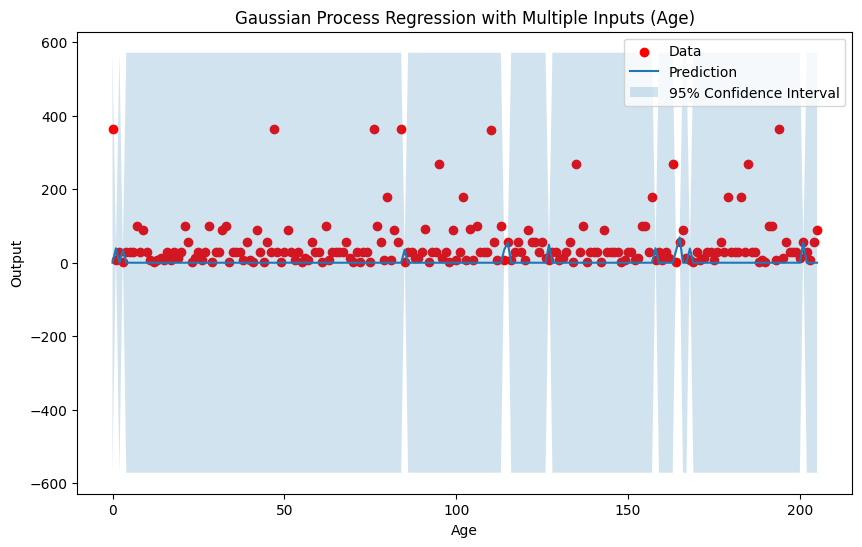

In [295]:
# Loop through all features and plot
for feature in X.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_copy.index, X_test_copy[feature], c='r', label="Data")
    plt.plot(X_test_copy.index, y_pred, label="Prediction")
    plt.fill_between(X_test_copy.index, y_pred - 1.96 * std, y_pred + 1.96 * std, alpha=0.2, label="95% Confidence Interval")
    plt.xlabel(feature)
    plt.ylabel("Output")
    plt.title(f"Gaussian Process Regression with Multiple Inputs ({feature})")
    plt.legend()
    plt.show()